# Ch.04 분류


### Logistic Regression

In [39]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn.datasets import load_iris
iris=load_iris()

In [41]:
# data, target, target_names, DESCR

data = iris.data
label = iris.target
columns = iris.feature_names
df = pd.DataFrame(data, columns=columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
                                train_test_split(data, label,\
                                test_size=0.2,shuffle=True,stratify = label,random_state=2019)

### 모델 객체 생성

In [43]:
from sklearn.linear_model import LogisticRegression

lr =  LogisticRegression(verbose = 1)

### 모델 학습

In [44]:
lr.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

### 예측(결과 확인)

In [45]:
y_pred_lr = lr.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)

0.9666666666666667

In [47]:
# 계수(weights)
lr.coef_

array([[-0.4331758 ,  0.82135237, -2.39403865, -0.96776796],
       [ 0.49039201, -0.29955397, -0.15924469, -0.91532022],
       [-0.05721621, -0.5217984 ,  2.55328334,  1.88308818]])

In [48]:
# 절편(bias)
lr.intercept_ 

array([  9.79503679,   2.02943481, -11.8244716 ])

### Support Vector Machine

In [49]:
from sklearn.svm import SVC

In [50]:
x_train, x_test, y_train, y_test = \
                                train_test_split(data, label,\
                                test_size=0.2,shuffle=True,stratify = label,random_state=2019)

In [51]:
svc = SVC()

In [52]:
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
y_pred_svc = svc.predict(x_test)

In [54]:
accuracy_score(y_test, y_pred_svc)

0.9666666666666667

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
x_train, x_test, y_train, y_test = \
                                train_test_split(data, label,\
                                test_size=0.2,shuffle=True,stratify = label,random_state=2019)

In [57]:
dtc = DecisionTreeClassifier()

In [58]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
y_pred_dtc = dtc.predict(x_test)

In [60]:
accuracy_score(y_test, y_pred_dtc)

0.9666666666666667

In [61]:
#### 결과값 비교

df =pd.DataFrame({'LR' : y_pred_lr, 'SVM' : y_pred_svc, 'DT' : y_pred_dtc, '정답' : y_test})

In [62]:
df

,LR,SVM,DT,정답
0,1,1,1,1
1,1,1,1,1
2,2,2,2,2
3,2,2,2,2
4,2,2,2,2
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [63]:
import numpy as np
import pandas as pd
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state =156)

iris_data = load_iris()


x_train, x_test, y_train, y_test =train_test_split(iris_data.data, iris_data.target,\
                                test_size=0.2,random_state=11)

dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [64]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names,\
               feature_names = iris_data.feature_names, impurity=True, filled=True)

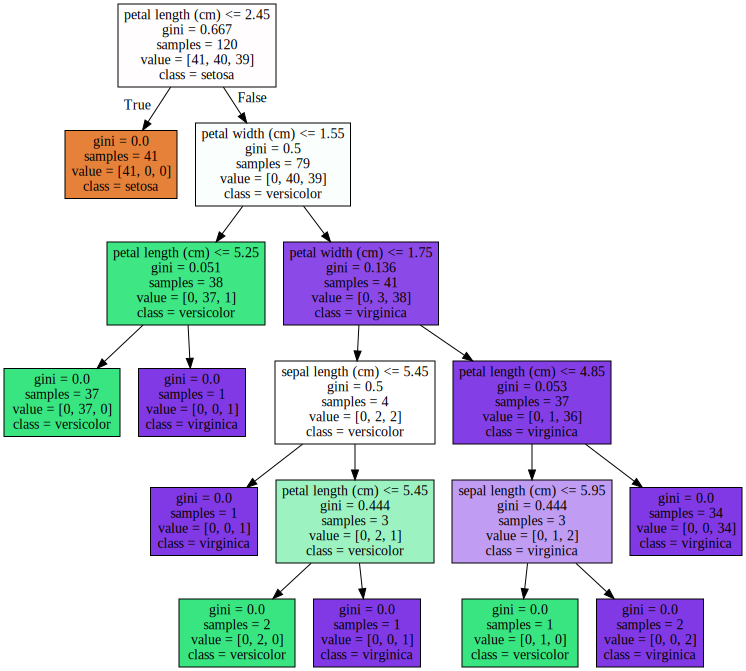

In [65]:
import graphviz

with open("tree.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [66]:
y_pred = dt_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

### 제약조건
- max_depth = 3

In [67]:
import numpy as np
import pandas as pd
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
dt_clf2 = DecisionTreeClassifier(max_depth = 3 , random_state =156)
dt_clf2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

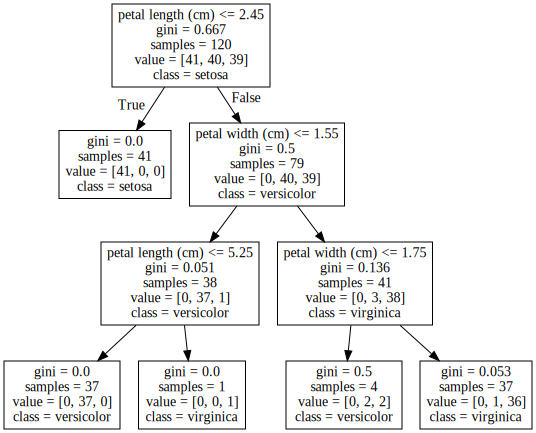

In [68]:
export_graphviz(dt_clf2, out_file="tree.dot", class_names = iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=False)
import graphviz
with open("tree.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [69]:
y_pred = dt_clf2.predict(x_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

In [71]:
dt_clf3 = DecisionTreeClassifier(min_samples_split = 3 , random_state =156)
dt_clf3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

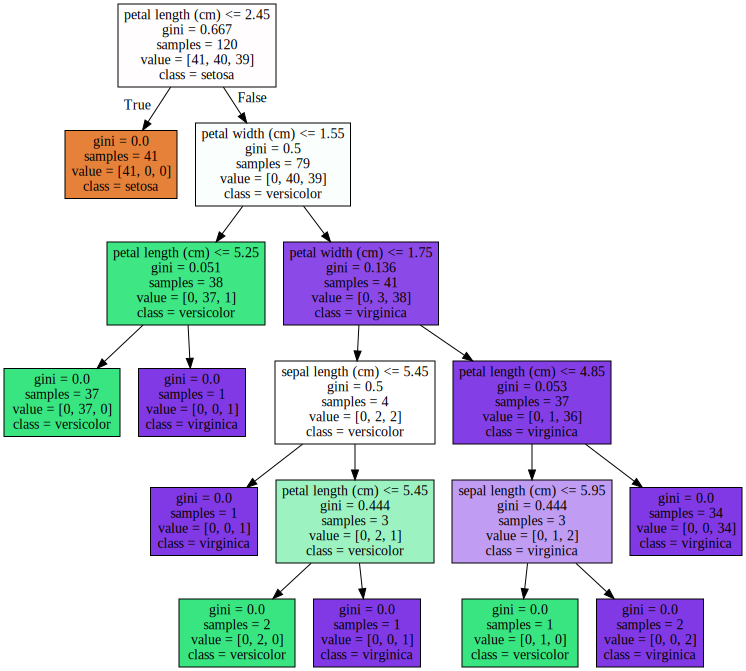

In [73]:
export_graphviz(dt_clf3, out_file="tree.dot", class_names = iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=True)
import graphviz
with open("tree.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [74]:
y_pred = dt_clf3.predict(x_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

In [75]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf = 3 , random_state =156)
dt_clf4.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

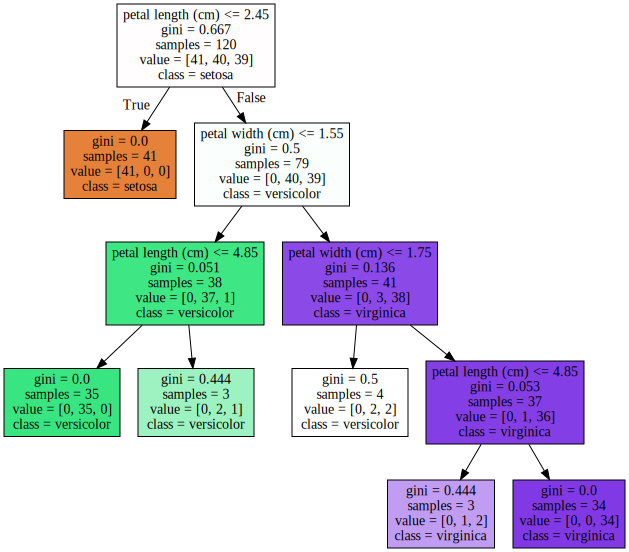

In [76]:
export_graphviz(dt_clf4, out_file="tree.dot", class_names = iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=True)
import graphviz
with open("tree.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [77]:
y_pred = dt_clf4.predict(x_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

### Feature 중요도

In [80]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

Feature importances : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


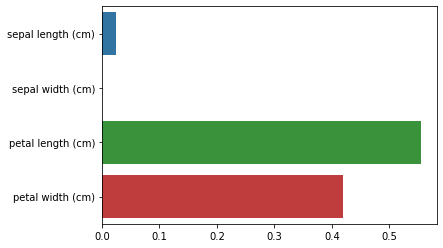

In [82]:
import seaborn as sns 
import numpy as np
%matplotlib inline

print("Feature importances : \n{0}".format(np.round(dt_clf.feature_importances_,3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

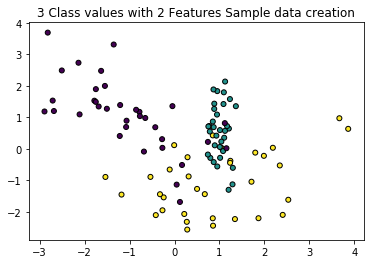

In [87]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

x_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,\
                                           n_classes=3,n_clusters_per_class=1,random_state=0)

plt.scatter(x_features[:,0], x_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [88]:
### page 203

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                             header = None , names = [])

In [106]:
### page 204 

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.dataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name']= new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x :x[0]+'_'+str(x[1])
                                                                             if x[1]>0 else x[0],axis=1)
    
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [ ]:
### page 205
import pandas as pd

def get_human_dataset():
    
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                                 header=None, names=['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    x_train = pd.read_csv('./human_activity/train/x_train.txt', sep='\s+',names=feature_name)
    x_test = pd.read_csv('./human_activity/train/x_train.txt', sep='\s+',names=feature_name)
    

### 앙상블 학습

In [93]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [92]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN',knn_clf)], voting='soft')

x_train, x_test, y_train, y_test =train_test_split(cancer.data, cancer.target,\
                                test_size=0.2,random_state=156)


vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


In [98]:
vo_clf.fit(x_train, y_train)
y_pred = vo_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

x_train, x_test, y_train, y_test =get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))


NameError: name 'get_human_dataset' is not defined

In [101]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(x_train,y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.9451


In [102]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf =8,\
                                min_samples_split=8, random_state=0)
rf_clf1.fit(x_train,y_train)
pred=rf_clf1.predict(x_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))


예측 정확도 : 0.9386


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train,columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y= ftr_top20.index)
plt.show

SyntaxError: positional argument follows keyword argument (<ipython-input-103-60fd821805c7>, line 6)

In [105]:
###page 224

from sklearn.ensemble import GradientBoostingClassifier

x_train, x_test, y_train, y_teat =  get_human_dataset()


NameError: name 'get_human_dataset' is not defined

In [ ]:
gb_clf = GradientBoosting(random_state =0, verbose=1)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier